# Colab & PyTorch Introduction

## Benefits of using Colab

### 1. Zero configuration & pre-installed environment

Include some commonly used packages in Python:

In [13]:
import numpy as np
import pandas
import sklearn
import matplotlib.pyplot as plt

Also, the common deep learning framework:

In [2]:
import keras
import torch

### 2. Free access to GPU

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Wed Feb 23 16:45:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch
print(torch.cuda.is_available())

True


The "cuda" stands for the **[Compute Unified Device](https://blogs.nvidia.com/blog/2012/09/10/what-is-cuda-2/) Architecture**, which is a parallel computing platform and programming model developed by Nvidia that makes using a GPU for general purpose computing. 

In Pytorch, if the 

```
torch.cuda.is_available()
```

is **True**, then the Pytorch successfully connected to GPU, and we can use GPU to compute and train our models.


### 3. Easy sharing

## Colab Tips:

### 1. Install packages or run commands

Easy to use NLP transformers models:
Transformers: https://huggingface.co/transformers/

In [ ]:
! pip install transformers

     |████████████████████████████████| 2.8 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 71.4 MB/s 
     |████████████████████████████████| 636 kB 81.4 MB/s 
     |████████████████████████████████| 3.3 MB 78.1 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Run commands:

Create a test folder

In [ ]:
#! mkdir test_folder

### 2. Load drive

Show alll files in your colab:

In [6]:
import os
from google.colab import drive

drive.mount('/content/drive') # mount the drive
cwd = os.path.join('drive', 'MyDrive')

# show all files
#print(os.listdir(cwd))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


List all files in this folder:

In [7]:
cwd = os.path.join('drive','MyDrive', 'BIA667_Lab')
print(os.listdir(cwd))

['ColabIntroduction.ipynb', 'hw', 'PytorchBasics.ipynb', 'PytorchDataset.ipynb']


## Pytorch & Tensor Basics


### Import Packages

> Import the torcch and torch.nn (torch neural networks module)

In [8]:
# import
import torch
import torch.nn as nn

### Setup device

Set up our training device: 

> If the gpu is available, we will use gpu. Otherwise, use cpu instead.



In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Tensor Operations

The basic building block in Pytorch is the tensor. Tensors are very similar to the narray in the numpy and it has many pre-defined operations:

In [14]:
# define a new tensor is similar to define a numpy array
a_numpy = np.array([7, 7, 7])
a_tensor = torch.Tensor([7, 7, 7])
print('Tensor and Numpy:')
print(a_numpy)
print(a_tensor)
print()

# tensor support basic operations
tensor1 = torch.Tensor([1, 2, 3])
tensor2 = torch.Tensor([2, 3, 4])
print('Basic Operations')
print('Add')
print(tensor1 + tensor2)
print('Multiply')
print(tensor1 * tensor2)
print()

# tensor object also has its own method
print('Tensor Oject method')
print(tensor1.add(tensor2))
print()

# function operates on tensor
print('Function operates on tensor')
max_value, max_index = torch.max(tensor1, dim=0)
print(f'Max value: {max_value}, Max Index: {max_index}')

Tensor and Numpy:
[7 7 7]
tensor([7., 7., 7.])

Basic Operations
Add
tensor([3., 5., 7.])
Multiply
tensor([ 2.,  6., 12.])

Tensor Oject method
tensor([3., 5., 7.])

Function operates on tensor
Max value: 3.0, Max Index: 2


Please note these opeartions will return a new tensor as result and the variables participating operations will not be modified. Alternatively, we can make these operations happens in-place. Instead of returing a extra tensor as result, in-place operations will directly change the content of given tensor. 

In [15]:
# not in-plcae
tensor1 = torch.Tensor([1, 2, 3])
tensor2 = torch.Tensor([2, 3, 4])
tensor1 = tensor1.add(tensor2)
print(tensor1)  # the content in tensor1 is not modified

# in-place
tensor1.add_(tensor2)
print(tensor1) # the content in tensor1 is modified

tensor([3., 5., 7.])
tensor([ 5.,  8., 11.])


In general, an in-place is the normal operation with extra '_' at the end. For example,


```
tensor.add() # not in-place
tensor.add_() # in-place

tensor.abs() # not in-place
tensor.abs_() # in-place
```

The in-place operation will be useful when you have limitation on memory. For example, if you have a huge tensor representation for a high resolution image, it may be costly to keep an another copy. For the full list of operations, please see [here](https://pytorch.org/docs/stable/tensors.html).


### Change the shape of the tensor
To change the shape of a tensor, we can use the 

```
Tensor.view()
```
which is similar to numpy.reshape(). Also, we can use -1 as place holder to let the pytorch find the correct shape for us.


In [16]:
# initialize a tensor with random numbers
a_tensor = torch.randn((100, 33, 22, 11), dtype=torch.float)
print(a_tensor.size())  # use Tensor.size() to find the shape
print()


# reshape to (33, 22, 11, 100)
reshaped1 = a_tensor.view(33, 22, 11, 100)
print('After reshape')
print(reshaped1.size())
print()

# use -1 as place holder
reshaped2 = a_tensor.view(33, -1, 10, 220)  # let pytorch calculate the last dimension for us
print('After reshape')
print(reshaped2.size())
print()

torch.Size([100, 33, 22, 11])

After reshape
torch.Size([33, 22, 11, 100])

After reshape
torch.Size([33, 11, 10, 220])



### Move Tensor to GPU/CPU
You may have heard deep learning models are training fatser on GPUs. To do this, we will need to move our data, which is represents as tensors, to GPU.

In [17]:
# get the device on your machine
cpu = torch.device('cpu')
gpu = torch.device('cuda')

# often we use the following one liner to help us choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move tensor to gpu
a_tensor = torch.Tensor([1, 2, 3])
a_tensor = a_tensor.to(gpu)  # you might get an error if you did not activate the gpu in your colab, see: https://colab.research.google.com/notebooks/gpu.ipynb
print('GPU tensor:')
print(a_tensor)
print()

# move back to cpu
a_tensor = a_tensor.to(cpu)
print('CPU tensor:')
print(a_tensor)
print()

GPU tensor:
tensor([1., 2., 3.], device='cuda:0')

CPU tensor:
tensor([1., 2., 3.])



The 
```
tensor(...., device='cuda:0')
```
menas we have successfully moved tensor to GPU:0.


## Datasets


In PyTorch, we define a dataset class to generate mini-batches for model training

### Dependicies

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, random_split, Dataset

In [18]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, random_split, Dataset

### Generate fake data

In [19]:
# fake data
features = torch.randn(size=(1000, 2)) * 20 + 30
w = torch.Tensor([1.5, 2])
targets = torch.matmul(features, w) + 1 +  torch.randn(size=(1000,))

### Check data

In [20]:
print(features[:5])

tensor([[36.6525, 13.8604],
        [37.0056, 55.6256],
        [32.3917, 41.7897],
        [63.2859, 24.9272],
        [15.1525, 20.7489]])


In [21]:
print(targets[:5])

tensor([ 82.3267, 167.7586, 134.6422, 144.8727,  65.9563])


In [22]:
type(features)

torch.Tensor

In [23]:
# varify data
print(f'features shape: {features.size()}')
print(f'targets shape: {targets.size()}')

features shape: torch.Size([1000, 2])
targets shape: torch.Size([1000])




```
torch.Tensor.size()
```
will return the size(shape) of the Tensor.  



In our case, the shape is (1000, 2) for features, which means we have 1000 data points and 2 features.



### Define Dataset Class
The dataset class should inherit from the pytorch's Dataset class, and we need to define:


1.   `__init__`: Initialize your parent class and preprocess
2.   `__getitem__`: Define how to retrieve your data by index, usually we return both data and corresponding label
3.   `__len__`: Define how to get the total length of your data(how many observations/data points/rows) in your dataset



In [24]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        super(MyDataset, self).__init__()
        self.features = torch.Tensor(features)
        self.labels = torch.Tensor(labels)  
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]
    
    def __len__(self):
        return self.labels.size()[0]

Create a dataset object:

In [26]:
dataset_example = MyDataset(features=features, labels=targets)

a_feature, a_target = dataset_example[0]
print(f'A feature:\n{a_feature}')
print(f'A target:\n{a_target}')

A feature:
tensor([36.6525, 13.8604])
A target:
82.32672119140625


### Split Dataset
To split our dataset to train, validation, test datasets, we can use the `random_split` function.

In [27]:
split_size = (np.array([0.6, 0.2, 0.2]) * len(dataset_example)).astype(np.int)
train_data, valid_data, test_data = random_split(dataset_example, lengths=split_size)

print(f'Train dataset length: {len(train_data)}')
print(f'Validation dataset length: {len(valid_data)}')
print(f'Test dataset length: {len(test_data)}')

Train dataset length: 600
Validation dataset length: 200
Test dataset length: 200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


### Data Loader
Convert to dataloader so we can use our data in train function:

In [28]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# one batch example
one_batch_features, one_batch_labels = next(train_loader.__iter__())
print(one_batch_features.size())  # (batch x num_features)
print(one_batch_labels.size())  # (batch x num_labels)

torch.Size([32, 2])
torch.Size([32])


## Put Everything Together: Simple Linear Regression


### Define Model


$$y = ax + b$$




In [29]:
# pytorch simple linear regression model
class SimpleLinearRegression(nn.Module):
    # initilize and set up the layers
    def __init__(self):
        # initialize parent class
        super(SimpleLinearRegression, self).__init__()
        # define linear layer
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)
    
    # how to pass your data through NN
    def forward(self, x):
        output = self.linear(x)
        return output

# model object
model = SimpleLinearRegression()

For the details of Pytorch Linear layers:
[Linear Layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)  


Take a look at the initialized parameters

In [30]:
print([i for i in model.parameters()])

[Parameter containing:
tensor([[-0.1966,  0.6684]], requires_grad=True), Parameter containing:
tensor([0.0591], requires_grad=True)]


### Define a loss function and optimizer

In [31]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training

In [32]:
# move model to (device: GPU)
model = model.to(device)

In [33]:
# traning loop
print('Training Starts:')

# training epochs
num_epochs = 1000

# record validation loss history
val_loss_hist = []

for epoch in range(num_epochs):

    model.train()  # start to train the model, activate training behavior
    train_loss = 0
    val_loss = 0

    for x, y in train_loader:

      # move batch to device
      x = x.to(device)
      y = y.to(device)

      # forward
      y_hat = model(x).squeeze()  # y_hat has shape (32,1), but y has shape (32,). Use squeeze to change y_hat's shape to (32,)


      # calculate loss
      loss = loss_func(y_hat, y)
      train_loss += (loss.detach().item())

      # backpropation: calculate the gradients
      loss.backward()
    
      # update weight based on gradients
      optimizer.step()

      # delete gradients after parameter update
      optimizer.zero_grad()

    # valid
    model.eval()  # put the model in evaluation model

    with torch.no_grad():  # tell pytorch not to update parameters
        
        for x, y in valid_loader:

          # move batch to device
          x = x.to(device)
          y = y.to(device)
          
          # forward
          y_hat = model(x).squeeze()

          # calculate loss
          loss = loss_func(y_hat, y)
          val_loss += (loss.detach().item())
    
    # print
    print(f"Epoch:{epoch + 1} / {num_epochs}, train loss:{train_loss/len(train_loader):.3f}, valid loss:{val_loss/len(valid_loader):.3f}")
    val_loss_hist.append(val_loss/len(valid_loader))

Training Starts:
Epoch:1 / 1000, train loss:10293.358, valid loss:9821.064
Epoch:2 / 1000, train loss:9969.612, valid loss:9911.798
Epoch:3 / 1000, train loss:9791.334, valid loss:9840.330
Epoch:4 / 1000, train loss:9522.004, valid loss:9604.985
Epoch:5 / 1000, train loss:9245.204, valid loss:8942.694
Epoch:6 / 1000, train loss:8992.308, valid loss:8605.342
Epoch:7 / 1000, train loss:8797.828, valid loss:8516.048
Epoch:8 / 1000, train loss:8587.433, valid loss:8073.622
Epoch:9 / 1000, train loss:8348.084, valid loss:8020.488
Epoch:10 / 1000, train loss:8131.169, valid loss:7519.508
Epoch:11 / 1000, train loss:7935.241, valid loss:7555.013
Epoch:12 / 1000, train loss:7740.336, valid loss:7717.530
Epoch:13 / 1000, train loss:7502.515, valid loss:6917.183
Epoch:14 / 1000, train loss:7298.234, valid loss:7048.142
Epoch:15 / 1000, train loss:7096.614, valid loss:6879.930
Epoch:16 / 1000, train loss:6889.314, valid loss:6549.749
Epoch:17 / 1000, train loss:6729.177, valid loss:6629.095
Epoch

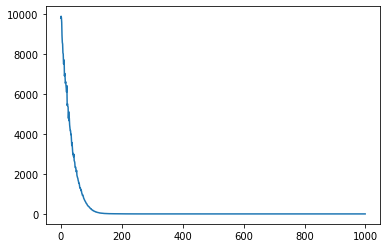

In [34]:
plt.plot(val_loss_hist)

Check the model parameters

Notice that the parameters are very close to the formula used in generating fake data.

In [35]:
print([i for i in model.parameters()])

[Parameter containing:
tensor([[1.5001, 2.0019]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.9342], device='cuda:0', requires_grad=True)]


### Test result

In [36]:
ys = []
yhats = []
model.eval()

for x, y in test_loader:
  
  # move batch to device
  x = x.to(device)
          
  # forward
  y_hat = model(x).squeeze().detach().cpu().numpy() # remove data from gpu to cpu, convert to numpy arary

  yhats.append(y_hat)      # y_hat has shape (batch,)
  ys.append(y.cpu().numpy())


In [37]:
# Concatenate the list of arrays to a single array
yhats = np.concatenate(yhats)
ys = np.concatenate(ys)

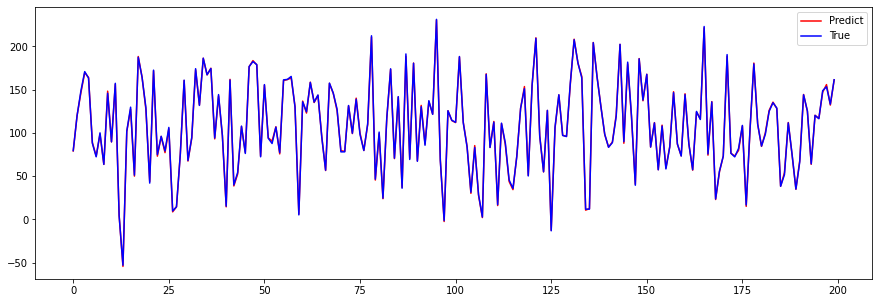

In [38]:
plt.figure(figsize=(15,5))
plt.plot(range(len(yhats)), yhats, 'r-', label='Predict')
plt.plot(range(len(ys)), ys, 'b-', label='True')
plt.legend()
plt.show()